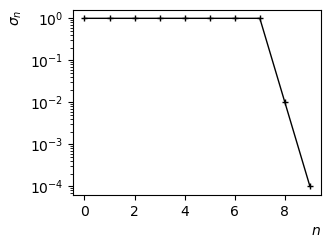

param| pos:[40,40,], iter: 0, loss: 5.000e-05, snr: -inf, grad: 0.000e+00: 100%|█████████▉| 1679/1681 [00:03<00:00, 520.21it/s]

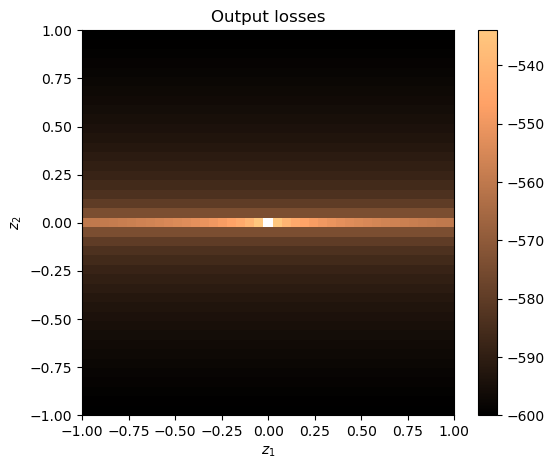

param| pos:[40,40,], iter: 0, loss: 5.000e-05, snr: -inf, grad: 0.000e+00: 100%|█████████▉| 1680/1681 [00:19<00:00, 520.21it/s]

In [1]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
from jackpot import Jackpot

params = {
    "experiment_name": "jupyter_tuto",
    "save_plot": True,
    "n_singular_pairs": 10,
    "max_compute_time": 3600,
    "load_sing_pairs": False,
    "save_sing_pairs": True,
    "D": 2,
    "epsilon": 1e-1,
    "n_points_per_axis": 41,
    "grid_length": 1.0,
    "load_manifold": False,
    "save_manifold": True,
}

# ------------------------------------
#  DIRECT MODEL (TO BE COMPLETED BY THE USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 100
x_center = torch.randn((N,), **factory_kwargs)

A_diag = torch.ones(N, **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jac_spectrum()

# Plot spectrum
jack.jac_spectrum_plot()
# ------------------------------------


# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

In [ ]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
import jackpot as jc

# ------------------------------------
# DIRECT MODEL (TO BE COMPLETED BY USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 100

def Phi(x): 
    return torch.cat(
        [(x[::2, ...] - x[1::2, ...])**2, x[2::2, ...]], axis=0)
    
    
# Initial guess
x_est = torch.randn((N,), device=device, dtype=dtype)
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = jc.Jackpot(Phi, x_est)

# Experiment name
jack.set_experiment_name("jupyter_tuto_2")

# Load/save options
jack.sing_load = False
jack.sing_save = not jack.sing_load
jack.adv_mani_load = False
jack.adv_mani_save = not jack.adv_mani_load 
jack.save_plots = True

# Jacobian singular spectrum parameters
jack.n_sing = 10
jack.sing_max_time = 3600

# Adversarial manifold parameters
jack.n_dim = 2
jack.epsilon = 1e-1
jack.n_discr_pts = 41
jack.grid_lengths = 1.0
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
if jack.sing_load:
    jack.jac_spectrum_load()
else:
    jack.jac_spectrum_compute()  # method="lobpcg" optional
    if jack.sing_save:
        jack.jac_spectrum_save()

# Plot spectrum
jack.jac_spectrum_plot()
# ------------------------------------


# ------------------------------------
# ADVERSARIAL MANIFOLD
# ------------------------------------
if jack.adv_mani_load:
    jack.manifold_load()
else:
    jack.adv_manifold_compute()
    if jack.adv_mani_save:
        jack.manifold_save()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    save_plot=jack.save_plots,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

In [ ]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
from jackpot import Jackpot

params = {
    "experiment_name": "jupyter_tuto_multi_D",
    "save_plot": True,
    "n_singular_pairs": 10,
    "max_compute_time": 3600,
    "load_sing_pairs": False,
    "save_sing_pairs": True,
    "D": 2,
    "epsilon": 1e-1,
    "n_points_per_axis": 41,
    "grid_length": 1.0,
    "load_manifold": False,
    "save_manifold": True,
}

# ------------------------------------
#  DIRECT MODEL (TO BE COMPLETED BY THE USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 50
x_center = torch.randn((N,N,), **factory_kwargs)

A_diag = 1 + torch.randn((N, N,), **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jac_spectrum()

# Plot spectrum
jack.jac_spectrum_plot()
# ------------------------------------


# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

In [ ]:
-adv_mani.plot_compare_with_linear(grid, x_est)
adv_mani.plot_losses()
adv_mani.plot_criteria()

In [ ]:
A = torch.randn((10, 10), **factory_kwargs)
x_example = torch.randn((10,), **factory_kwargs)

sing_solv = jc.SingularSolver(lambda x : A @ x, lambda x : A.T @ x, x_example)